An AI/ML skill is a technical ability or expertise that enables individuals to work with artificial intelligence and machine learning technologies effectively. Here are some common AI/ML skills:

In [1]:
import os
import pandas as pd
import sys
import re

from dotenv import load_dotenv
from openai import AzureOpenAI

from langchain_openai import AzureChatOpenAI

import csv
import time
from datetime import date, datetime
print('Python version:', sys.version)
print('\nWorking directory:', os.getcwd())
%cd C:\\Users\\Denis_Davydov2\\OneDrive\\Scipts\\Py_Scripts\\EPAM\\Prophet\\AI_skills
print('\nCurrent working directory:', os.getcwd())
print("Last run:", date.today())

Python version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]

Working directory: c:\Users\Denis_Davydov2\OneDrive\Scipts\Py_Scripts\EPAM\Prophet\AI_skills
C:\Users\Denis_Davydov2\OneDrive\Scipts\Py_Scripts\EPAM\Prophet\AI_skills

Current working directory: C:\Users\Denis_Davydov2\OneDrive\Scipts\Py_Scripts\EPAM\Prophet\AI_skills
Last run: 2025-11-08


# Topics cleaning

## Get all topics from csv

In [6]:
folder_path = r'C:\Users\Denis_Davydov2\OneDrive - EPAM\Prophet_AI_docs\Datasets\AI_skills\All_extracted'

# Get list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Create a dictionary to store all dataframes
dfs = {}

# Read each CSV file into a dataframe
for file in csv_files:
    # Get the filename without extension as key
    df_name = os.path.splitext(file)[0]
    # Read the CSV file
    file_path = os.path.join(folder_path, file)
    dfs[df_name] = pd.read_csv(file_path)
    print(f"Loaded: {df_name}")

# Display the names of loaded dataframes
print("\nLoaded dataframes:", list(dfs.keys()))

Loaded: topics_inoreader_gemini25flash_2025-10-30
Loaded: topics_inoreader_gpt5mini_2025-10-31
Loaded: topics_inoreader_gpt5nano_2025-10-29
Loaded: topics_inoreade_claude35_sonnet_2025-11-01
Loaded: topics_smol_claude35_sonnet_2025-11-01
Loaded: topics_smol_gemini25flash_2025-10-31
Loaded: topics_smol_gpt5mini_2025-10-31
Loaded: topics_smol_gpt5nano_2025-10-31

Loaded dataframes: ['topics_inoreader_gemini25flash_2025-10-30', 'topics_inoreader_gpt5mini_2025-10-31', 'topics_inoreader_gpt5nano_2025-10-29', 'topics_inoreade_claude35_sonnet_2025-11-01', 'topics_smol_claude35_sonnet_2025-11-01', 'topics_smol_gemini25flash_2025-10-31', 'topics_smol_gpt5mini_2025-10-31', 'topics_smol_gpt5nano_2025-10-31']


In [7]:
topics = pd.concat(dfs.values())
print("Rows:", len(topics))
topics

Rows: 12217


,id,topics
0,0.0,"Generative AI, LLM APIs, Prompt Engineering"
1,1.0,"Artificial General Intelligence, AI resilience"
2,2.0,"AI-integrated browsers, face-scanning"
3,3.0,"Generative AI, AI Assistants, Prompt Engineeri..."
4,4.0,"LLM reasoning, pattern matching, chain-of-thou..."
...,...,...
398,398.0,"LangChain, Prompt Engineering, Retrieval-Augme..."
399,399.0,"Vector Search, RAG, Prompt Engineering, LangCh..."
400,400.0,"LangChain, LLM APIs, Prompt Engineering, Agent..."
401,401.0,"LangChain, Prompt Engineering, LLMs, Reinforce..."


In [8]:
# Split the topics by comma and explode them into separate rows
exploded_topics = topics['topics'].str.split(',').explode().str.strip()
print("total topics:", len(exploded_topics))
exploded_topics


total topics: 150618


0                        Generative AI
0                             LLM APIs
0                   Prompt Engineering
1      Artificial General Intelligence
1                        AI resilience
                    ...               
402                 Prompt Engineering
402                   Prompt Injection
402                Multi-Agent Systems
402                    Computer Vision
402                                NLP
Name: topics, Length: 150618, dtype: object

In [9]:
# Remove duplicates and reset index
clean_topics = exploded_topics.drop_duplicates().reset_index(drop=True)

# Standardize characters (replace various types of hyphens and dashes with standard hyphen)
clean_topics = clean_topics.str.replace('–', '-')  # en dash
clean_topics = clean_topics.str.replace('—', '-')  # em dash
clean_topics = clean_topics.str.replace('‐', '-')  # hyphen
clean_topics = clean_topics.str.replace('\u2010', '-')  # hyphen
clean_topics = clean_topics.str.replace('\u2011', '-')  # non-breaking hyphen
clean_topics = clean_topics.str.replace('\u2012', '-')  # figure dash
clean_topics = clean_topics.str.replace('\u2013', '-')  # en dash
clean_topics = clean_topics.str.replace('\u2014', '-')  # em dash
clean_topics = clean_topics.str.replace('\u2015', '-')  # horizontal bar
clean_topics = clean_topics.drop_duplicates().reset_index(drop=True)

print(f"Original topics count: {len(exploded_topics)}")
print(f"Unique topics count: {len(clean_topics)}")

Original topics count: 150618
Unique topics count: 22190


In [10]:
# Remove entries that contain only 'nan' or 'None'
print(f"Topics before cleaning: {len(clean_topics)}")
clean_topics = clean_topics[~clean_topics.str.lower().isin(['nan', 'none'])]
clean_topics = clean_topics.dropna()

# Reset index after filtering
clean_topics = clean_topics.reset_index(drop=True)

print(f"Topics before cleaning: {len(clean_topics)}")
print(f"Topics after cleaning: {len(clean_topics)}")
print("\nFirst 10 cleaned topics:")
clean_topics

Topics before cleaning: 22190
Topics before cleaning: 22187
Topics after cleaning: 22187

First 10 cleaned topics:


0                          Generative AI
1                               LLM APIs
2                     Prompt Engineering
3        Artificial General Intelligence
4                          AI resilience
                      ...               
22182                 Narrative Planning
22183          Tool-Augmented Generation
22184             On-Policy Distillation
22185         Post-Training Distillation
22186                      Cross-Lingual
Name: topics, Length: 22187, dtype: object

In [11]:
# Remove entries that start with 'None '
print(f"Topics before cleaning: {len(clean_topics)}")
clean_topics1 = clean_topics[~clean_topics.str.startswith('None ', na=False)]
clean_topics1 = clean_topics1.reset_index(drop=True)

print(f"Topics after cleaning: {len(clean_topics1)}")
print("\nFirst 10 cleaned topics:")
clean_topics1 = clean_topics1.str.lower().str.strip()
clean_topics1

Topics before cleaning: 22187
Topics after cleaning: 22178

First 10 cleaned topics:


0                          generative ai
1                               llm apis
2                     prompt engineering
3        artificial general intelligence
4                          ai resilience
                      ...               
22173                 narrative planning
22174          tool-augmented generation
22175             on-policy distillation
22176         post-training distillation
22177                      cross-lingual
Name: topics, Length: 22178, dtype: object

In [23]:
# Remove unwanted prompt-like prefixes from topics (case-insensitive)
unwanted_prefixes = [
    'artificial intelligence (ai) skills from the text: ',
    'here are the ai-related skills explicitly mentioned or strongly implied in the text: ',
    'here are the ai-related skills identified from the text: ',
    'here are the ai-related skills mentioned in the text: ',
    'here are the ai-related skills mentioned or strongly implied in the text: ',
    'here are the distinct ai-related skills mentioned in the text: ',
    'here are the identified ai-related skills from the text',
    'here are the key ai-related skills identified from the text: ',
    'here are the key ai-related technical skills mentioned in the text: ',
    'here are the relevant ai-related skills: ',
    "here's a comma-separated list of ai-related skills mentioned in the text: ",
    "here are the ai-related skills mentioned or implied in the text: ",
    "here are the ai-related skills mentioned or strongly implied in the text: ",
    "here are the key ai-related skills mentioned in the text: ",
    "here are the key ai-related skills mentioned or implied in the text: ",
    "here are the key ai-related skills mentioned or strongly implied in the text: ",
    "organized in a comma-separated list: ",
    ": "
]

print(f"Topics before prefix removal: {len(clean_topics1)}")

# Apply all replacements (case-insensitive)
clean_topics1_no_prefix = clean_topics1.copy()
for prefix in unwanted_prefixes:
    # Use regex with case-insensitive flag to remove prefix if it appears at the start
    clean_topics1_no_prefix = clean_topics1_no_prefix.str.replace(
        f'^{re.escape(prefix)}', '', regex=True, case=False
    )

# Strip any leading/trailing whitespace created by removal
clean_topics1_no_prefix = clean_topics1_no_prefix.str.strip()

# Drop any duplicates created by prefix removal
before_dedup = len(clean_topics1_no_prefix)
clean_topics1_no_prefix = clean_topics1_no_prefix.drop_duplicates().reset_index(drop=True)
after_dedup = len(clean_topics1_no_prefix)

print(f"Topics after prefix removal: {before_dedup}")
print(f"Unique topics after dedup: {after_dedup}")
print(f"Duplicates removed: {before_dedup - after_dedup}")

# Show sample of changes (find topics that were modified)
changes_sample = []
for orig, cleaned in zip(clean_topics1, clean_topics1_no_prefix):
    if orig != cleaned and orig in clean_topics1.values:
        # Find if this original still exists in cleaned version
        idx_orig = clean_topics1[clean_topics1 == orig].index[0] if orig in clean_topics1.values else None
        idx_clean = clean_topics1_no_prefix[clean_topics1_no_prefix == cleaned].index[0] if cleaned in clean_topics1_no_prefix.values else None
        if idx_orig is not None and idx_clean is not None and idx_orig < len(clean_topics1_no_prefix):
            changes_sample.append((orig, clean_topics1_no_prefix.iloc[idx_orig]))
            if len(changes_sample) >= 10:
                break

if changes_sample:
    print("\nSample prefix removals (up to 10):")
    for orig, cleaned in changes_sample:
        print(f"  BEFORE: {orig[:100]}...")
        print(f"  AFTER:  {cleaned[:100]}...\n")

# Reassign for downstream pipeline
clean_topics1 = clean_topics1_no_prefix.copy()
print(f"\nFinal clean_topics1 count: {len(clean_topics1)}")
clean_topics1.head(15)

Topics before prefix removal: 20159
Topics after prefix removal: 20159
Unique topics after dedup: 20159
Duplicates removed: 0

Final clean_topics1 count: 20159


0                       generative ai
1                            llm apis
2                  prompt engineering
3     artificial general intelligence
4                       ai resilience
5              ai-integrated browsers
6                       face-scanning
7                       ai assistants
8                     voice synthesis
9                    audio generation
10                      image editing
11                      llm reasoning
12                   pattern matching
13                   chain-of-thought
14             vision-language models
Name: topics, dtype: object

In [24]:
# Normalize punctuation, spaces, and general Unicode forms to ensure consistent UTF-8 friendly text
import unicodedata
import re

# Start from clean_topics Series produced earlier
normalized_topics = clean_topics1.copy()

# 1. Unicode normalization (NFKC) to flatten compatibility characters (e.g., full-width forms)
normalized_topics = normalized_topics.apply(lambda x: unicodedata.normalize('NFKC', x) if isinstance(x, str) else x)

# 2. Replace various space characters with a regular space
SPACE_CHARS = [
    '\u00A0',  # no-break space
    '\u1680', '\u2000', '\u2001', '\u2002', '\u2003', '\u2004', '\u2005', '\u2006',
    '\u2007', '\u2008', '\u2009', '\u200A', '\u202F', '\u205F', '\u3000'
]
space_pattern = re.compile('|'.join(SPACE_CHARS))
normalized_topics = normalized_topics.str.replace(space_pattern, ' ', regex=True)

# 3. Standardize punctuation (commas, colons, semicolons, quotes)
PUNCT_MAP = {
    '，': ',',  # full-width comma
    '､': ',',
    '﹐': ',',
    '：': ':',  # full-width colon
    '；': ';',
    '﹔': ';',
    '﹕': ':',
    '“': '"', '”': '"', '‟': '"', '＂': '"',
    '‘': "'", '’': "'", '‚': "'", '‛': "'", '＇': "'",
    '…': '...',
}
if PUNCT_MAP:
    punct_pattern = re.compile('|'.join(map(re.escape, PUNCT_MAP.keys())))
    normalized_topics = normalized_topics.str.replace(punct_pattern, lambda m: PUNCT_MAP[m.group(0)], regex=True)

# 4. Collapse multiple spaces to single
normalized_topics = normalized_topics.str.replace(r'\s+', ' ', regex=True).str.strip()

# 5. Drop duplicates created by normalization
normalized_topics = normalized_topics.drop_duplicates().reset_index(drop=True)

print(f"Unique topics before normalization: {len(clean_topics1)}")
print(f"Unique topics after normalization: {len(normalized_topics)}")

# 6. Quick diff sample
changes = []
for orig, norm in zip(clean_topics1, normalized_topics):
    if orig != norm:
        changes.append((orig, norm))
        if len(changes) >= 10:
            break

if changes:
    print("Sample changed topics (up to 10):")
    for o, n in changes:
        print(f"  ORIG: {o}\n  NORM: {n}\n")
else:
    print("No differences detected in sample.")



normalized_topics

Unique topics before normalization: 20159
Unique topics after normalization: 20159
Sample changed topics (up to 10):
  ORIG: humanity’s last exam
  NORM: humanity's last exam

  ORIG: τ²-bench telecom
  NORM: τ2-bench telecom

  ORIG: cognition’s devin ai
  NORM: cognition's devin ai

  ORIG: google’s coding agent jules
  NORM: google's coding agent jules

  ORIG: cognition’s devin
  NORM: cognition's devin

  ORIG: patch n’ pack
  NORM: patch n' pack

  ORIG: google cloud’s dynamic workload scheduler
  NORM: google cloud's dynamic workload scheduler

  ORIG: google cloud’s ai hypercomputer
  NORM: google cloud's ai hypercomputer

  ORIG: nvidia’s open-source software stack
  NORM: nvidia's open-source software stack

  ORIG: aime’24
  NORM: aime'24



0                          generative ai
1                               llm apis
2                     prompt engineering
3        artificial general intelligence
4                          ai resilience
                      ...               
20154          memory-augmented learning
20155                 narrative planning
20156          tool-augmented generation
20157         post-training distillation
20158                      cross-lingual
Name: topics, Length: 20159, dtype: object

In [56]:
# Lowercase normalized topics and remove duplicates
normalized_topics_lower = normalized_topics.str.lower().str.strip()

before_count = len(normalized_topics_lower)
normalized_topics_lower = normalized_topics_lower.drop_duplicates().reset_index(drop=True)
normalized_topics_lower = normalized_topics_lower.sort_values().reset_index(drop=True)
after_count = len(normalized_topics_lower)

print(f"Topics before lowercasing/dedup: {before_count}")
print(f"Unique topics after lowercasing/dedup: {after_count}")

# Show sample
normalized_topics_lower.head(25)clean_topics2 = clean_topics1.copy()    clean_topics2 = clean_topics2.str.replace(

Topics before prefix removal: 146730
Topics after prefix removal: 146730
Topics after prefix removal: 146730


Topics before prefix removal: 146730
Topics after prefix removal: 146730
Topics after prefix removal: 146730


0                        generative ai
0                             llm apis
0                   prompt engineering
1      artificial general intelligence
1                        ai resilience
                    ...               
402                 prompt engineering
402                   prompt injection
402                multi-agent systems
402                    computer vision
402                                nlp
Name: topics, Length: 146730, dtype: object

In [57]:
# Find and merge semantically similar topics with spelling variations
from collections import defaultdict

def normalize_for_grouping(topic):
    """Apply aggressive normalization to find similar topics."""
    if pd.isna(topic) or not isinstance(topic, str):
        return ""
    
    s = topic.lower().strip()
    
    # Remove plural 's' at end of words (but preserve 'oss', 'sass', etc.)
    s = re.sub(r'\b(\w{3,})s\b', r'\1', s)
    
    # Normalize common verb forms: testing->test, learning->learn, etc.
    s = re.sub(r'\b(\w+)ing\b', r'\1', s)
    s = re.sub(r'\b(\w+)ed\b', r'\1', s)
    
    # Remove hyphens and slashes for comparison (but keep in display)
    # We'll use this for grouping key only
    key = s.replace('-', '').replace('/', '').replace('_', '')
    key = re.sub(r'\s+', ' ', key).strip()
    
    return key

# Build a mapping from normalized key to list of original topics
topic_groups = defaultdict(list)

for topic in clean_topics2:
    if pd.notna(topic):
        key = normalize_for_grouping(topic)
        if key:  # Skip empty keys
            topic_groups[key].append(topic)

# Find groups with multiple variants
multi_variants = {k: v for k, v in topic_groups.items() if len(v) > 1}
print(f"Found {len(multi_variants)} groups with multiple spelling variants")

# Show sample groups
print("\nSample groups with variants (first 20):")
for i, (key, variants) in enumerate(sorted(multi_variants.items())[:20]):
    print(f"\nGroup {i+1}: {len(variants)} variants")
    for v in sorted(variants):
        print(f"  - {v}")

# Create a canonical mapping: choose shortest variant as canonical
canonical_map = {}
for key, variants in topic_groups.items():
    if len(variants) > 1:
        # Choose shortest, or alphabetically first if same length
        canonical = min(variants, key=lambda x: (len(x), x))
        for variant in variants:
            if variant != canonical:
                canonical_map[variant] = canonical

print(f"\nTotal mappings to create: {len(canonical_map)}")

# Apply the canonical mapping
clean_topics3 = clean_topics2.map(lambda x: canonical_map.get(x, x))
clean_topics3 = clean_topics3.sort_values().reset_index(drop=True)

print(f"\nTopics before merging: {len(clean_topics2)}")
print(f"Topics after merging: {len(clean_topics3)}")
print(f"Reduced by: {len(clean_topics2) - len(clean_topics3)}")

# Show some examples of what was merged
print("\nExample merges (first 15):")
for i, (variant, canonical) in enumerate(sorted(canonical_map.items())[:15]):
    print(f"  {variant} → {canonical}")

print("\n================================================================================")
print("Total topics:", len(clean_topics3))
clean_topics3

Found 7606 groups with multiple spelling variants

Sample groups with variants (first 20):

Group 1: 11 variants
  - .net
  - .net
  - .net
  - .net
  - .net
  - .net
  - .net
  - .net
  - .net
  - .net
  - .net

Group 2: 2 variants
  - 000hz
  - 000hz

Group 3: 5 variants
  - 000mah
  - 000mah
  - 000mah
  - 000mah
  - 000mah

Group 4: 2 variants
  - 1-bit inference
  - 1-bit inference

Group 5: 5 variants
  - 1-bit llm
  - 1-bit llms
  - 1-bit llms
  - 1-bit llms
  - 1-bit llms

Group 6: 6 variants
  - 1-bit quantization
  - 1-bit quantization
  - 1-bit quantization
  - 1-bit quantization
  - 1-bit quantization
  - 1-bit quantization

Group 7: 4 variants
  - 2-bit quantization
  - 2-bit quantization
  - 2-bit quantization
  - 2-bit quantization

Group 8: 3 variants
  - 2d animation
  - 2d animation
  - 2d animation

Group 9: 2 variants
  - 2d-to-3d conversion
  - 2d-to-3d conversion

Group 10: 3 variants
  - 3
  - 3
  - 3

Group 11: 6 variants
  - 3d animation
  - 3d animation
  - 3d

0                              
1                          .net
2                          .net
3                          .net
4                          .net
                  ...          
146725              zmp control
146726          zombie startups
146727    zone-based navigation
146728                     zoom
146729         τ2-bench telecom
Name: topics, Length: 146730, dtype: object

In [61]:
# Remove topics containing any of the unwanted substrings (case-insensitive)
unwanted_substrings = [
    "rather than technical implementation or development skills",
    "but does not explicitly mention",
    "and talent management in the entertainment industry",
    "but does not contain",
    "it doesn't explicitly",
    "it focuses on user behavior",
    "midjourney the list represents skills mentioned explicitly",
    "these don't constitute",
    ".net",
    "000hz",
    "00hz",
    "000mah"
]

# Build a single regex pattern joined by alternation (no inline flags)
# Use re.IGNORECASE in str.contains for case-insensitive matching
pattern = '|'.join([re.escape(s) for s in unwanted_substrings])

before_len = len(clean_topics3)
mask_remove = clean_topics3.str.contains(pattern, regex=True, case=False, na=False)
filtered_topics = clean_topics3[~mask_remove]
after_len = len(filtered_topics)

print(f"Topics before filtering: {before_len}")
print(f"Topics after filtering:  {after_len}")
print(f"Removed: {before_len - after_len}")

# Reassign merged_topics to filtered result for downstream cells
clean_topics4 = filtered_topics

clean_topics4

Topics before filtering: 146730
Topics after filtering:  146701
Removed: 29


0                              
19              1-bit inference
20              1-bit inference
21                    1-bit llm
22                    1-bit llm
                  ...          
146725              zmp control
146726          zombie startups
146727    zone-based navigation
146728                     zoom
146729         τ2-bench telecom
Name: topics, Length: 146701, dtype: object

In [63]:
# Identify and merge semantic duplicates: abbreviations + full forms
# Strategy: detect common AI abbreviation patterns and their expansions
clean_topics5 = clean_topics4.copy()

from collections import defaultdict

# Known abbreviation mappings (expandable)
KNOWN_ABBREV_MAP = {
    'ai': 'artificial intelligence',
    'ml': 'machine learning',
    'nlp': 'natural language processing',
    'cv': 'computer vision',
    'dl': 'deep learning',
    'rl': 'reinforcement learning',
    'gan': 'generative adversarial network',
    'gans': 'generative adversarial networks',
    'cnn': 'convolutional neural network',
    'cnns': 'convolutional neural networks',
    'rnn': 'recurrent neural network',
    'rnns': 'recurrent neural networks',
    'lstm': 'long short-term memory',
    'gru': 'gated recurrent unit',
    'bert': 'bidirectional encoder representations from transformers',
    'gpt': 'generative pre-trained transformer',
    'vae': 'variational autoencoder',
    'api': 'application programming interface',
    'apis': 'application programming interfaces',
    'sdk': 'software development kit',
    'rag': 'retrieval augmented generation',
    'llm': 'large language model',
    'llms': 'large language models',
    'asr': 'automatic speech recognition',
    'tts': 'text-to-speech',
    'ocr': 'optical character recognition',
    'roi': 'return on investment',
    'kpi': 'key performance indicator',
    'kpis': 'key performance indicators',
    'mlops': 'machine learning operations',
    'devops': 'development operations',
    'cicd': 'continuous integration continuous deployment',
    'ci/cd': 'continuous integration continuous deployment',
    'aws': 'amazon web services',
    'gcp': 'google cloud platform',
    'sql': 'structured query language',
    'nosql': 'non-relational database',
    'etl': 'extract transform load',
    'ui': 'user interface',
    'ux': 'user experience',
    'saas': 'software as a service',
    'paas': 'platform as a service',
    'iaas': 'infrastructure as a service',
}

print(f"Starting with {len(clean_topics4)}  topics")

# Build a mapping of detected abbreviation-full form pairs
abbrev_to_full = {}
full_to_abbrev = {}

topics_set = set(clean_topics5)

# 1. Check known abbreviations
for abbrev, full_form in KNOWN_ABBREV_MAP.items():
    abbrev_clean = abbrev.lower().strip()
    full_clean = full_form.lower().strip()
    
    if abbrev_clean in topics_set and full_clean in topics_set:
        # Both exist - merge them
        abbrev_to_full[abbrev_clean] = full_clean
        full_to_abbrev[full_clean] = abbrev_clean
        print(f"  Found pair: '{abbrev_clean}' <-> '{full_clean}'")
    elif abbrev_clean in topics_set:
        # Only abbrev exists, but we know the full form - keep abbrev as-is for now
        pass
    elif full_clean in topics_set:
        # Only full form exists - keep it
        pass

# 2. Detect patterns like "full form (abbrev)" or "abbrev (full form)" already in data
pattern_with_parens = re.compile(r'^(.+?)\s*\(([^)]+)\)$')
for topic in topics_set:
    match = pattern_with_parens.match(topic)
    if match:
        part1 = match.group(1).strip().lower()
        part2 = match.group(2).strip().lower()
        
        # Heuristic: shorter part is likely abbreviation
        if len(part2) <= 5 and len(part1) > len(part2):
            # part2 is abbreviation
            if part2 in topics_set or part1 in topics_set:
                abbrev_to_full[part2] = part1
                full_to_abbrev[part1] = part2
        elif len(part1) <= 5 and len(part2) > len(part1):
            # part1 is abbreviation
            if part1 in topics_set or part2 in topics_set:
                abbrev_to_full[part1] = part2
                full_to_abbrev[part2] = part1

print(f"\nDetected {len(abbrev_to_full)} abbreviation-full form pairs")

# 3. Create canonical mapping: merge both into "full form (abbrev)"
canonical_map = {}

for abbrev, full in abbrev_to_full.items():
    canonical = f"{full} ({abbrev})"
    # Map both abbreviation and full form to canonical
    canonical_map[abbrev] = canonical
    canonical_map[full] = canonical
    
print(f"\nCreated {len(canonical_map)} merge mappings")

# Sample mappings
print("\nSample canonical mappings (first 15):")
for i, (orig, canon) in enumerate(sorted(canonical_map.items())[:15]):
    print(f"  '{orig}' → '{canon}'")

# 4. Apply canonical mapping to topic_items
before_count = len(clean_topics5)
clean_topics6 = clean_topics5.map(lambda x: canonical_map.get(x.lower().strip(), x) if pd.notna(x) else x)
clean_topics6 = clean_topics6.sort_values().reset_index(drop=True)
after_count = len(clean_topics6)

print(f"\n{'='*80}")
print(f"Topics before merging semantic duplicates: {before_count}")
print(f"Topics after merging:                      {after_count}")
print(f"Reduced by:                                 {before_count - after_count}")
print(f"{'='*80}")

# Show examples of what changed
merged_examples = []
for orig in clean_topics6.head(100):
    if pd.notna(orig):
        canonical = canonical_map.get(orig.lower().strip())
        if canonical and canonical != orig:
            merged_examples.append((orig, canonical))
            if len(merged_examples) >= 10:
                break

if merged_examples:
    print("\nExample merges (up to 10):")
    for orig, merged in merged_examples:
        print(f"  '{orig}' → '{merged}'")


print(f"\nFinal clean_topics6 count: {len(clean_topics6)}")
clean_topics6.head(25)

Starting with 146701  topics
  Found pair: 'ai' <-> 'artificial intelligence'
  Found pair: 'ml' <-> 'machine learning'
  Found pair: 'nlp' <-> 'natural language processing'
  Found pair: 'cnn' <-> 'convolutional neural network'
  Found pair: 'rnn' <-> 'recurrent neural network'
  Found pair: 'lstm' <-> 'long short-term memory'
  Found pair: 'vae' <-> 'variational autoencoder'
  Found pair: 'rag' <-> 'retrieval augmented generation'
  Found pair: 'llm' <-> 'large language model'
  Found pair: 'asr' <-> 'automatic speech recognition'
  Found pair: 'tts' <-> 'text-to-speech'
  Found pair: 'ocr' <-> 'optical character recognition'
  Found pair: 'mlops' <-> 'machine learning operations'
  Found pair: 'aws' <-> 'amazon web services'
  Found pair: 'gcp' <-> 'google cloud platform'

Detected 349 abbreviation-full form pairs

Created 676 merge mappings

Sample canonical mappings (first 15):
  '128k' → 'long-context llms (128k)'
  '4-bit' → 'quantization (4-bit)'
  '4-bit quantization' → '4-bit

0                                
1                 1-bit inference
2                 1-bit inference
3                       1-bit llm
4                       1-bit llm
5                       1-bit llm
6                       1-bit llm
7                       1-bit llm
8           1-bit neural networks
9              1-bit quantization
10             1-bit quantization
11             1-bit quantization
12             1-bit quantization
13             1-bit quantization
14             1-bit quantization
15             1-bit transformers
16    1.5b-parameter llm backbone
17            128k context window
18                             1u
19             2-bit quantization
20             2-bit quantization
21             2-bit quantization
22             2-bit quantization
23                         2.4ghz
24            2.5d representation
Name: topics, dtype: object

In [74]:
# Remove topics containing any of the unwanted substrings (case-insensitive)
unwanted_substrings = [
    "rather than technical implementation or development skills",
    "but does not explicitly mention",
    "and talent management in the entertainment industry",
    "but does not contain",
    "it doesn't explicitly",
    "it focuses on user behavior",
    "midjourney the list represents skills mentioned explicitly",
    "these don't constitute"
]

# Build a single regex pattern joined by alternation (no inline flags)
# Use re.IGNORECASE in str.contains for case-insensitive matching
pattern = '|'.join([re.escape(s) for s in unwanted_substrings])

before_len = len(merged_topics)
mask_remove = merged_topics.str.contains(pattern, regex=True, case=False, na=False)
filtered_topics = merged_topics[~mask_remove]
after_len = len(filtered_topics)

print(f"Topics before filtering: {before_len}")
print(f"Topics after filtering:  {after_len}")
print(f"Removed: {before_len - after_len}")

# Show removed samples (if any)
removed = merged_topics[mask_remove]
if len(removed):
    print("\nRemoved topics (up to 15):")
    for t in removed.head(15):
        print(" -", t)
else:
    print("No topics matched removal criteria.")

# Reassign merged_topics to filtered result for downstream cells
merged_topics = filtered_topics.reset_index(drop=True)

# Recompute multiword_topics after filtering (keep threshold consistent)
words = 4
multiword_topics = (
    merged_topics
        .dropna()
        .loc[merged_topics.str.strip().str.split().str.len() > words]
        .sort_values()
        .reset_index(drop=True)
)
print(f"\nRecomputed multiword topics (> {words} words): {len(multiword_topics)}")

merged_topics.head(25)

Created DataFrame with 146701 topics
Rows after removing empty topics: 146700


,topic
0,1-bit inference
1,1-bit inference
2,1-bit llm
3,1-bit llm
4,1-bit llm
...,...
146695,zmp control
146696,zombie startups
146697,zone-based navigation
146698,zoom


Total unique topics: 19011

Top 20 topics by frequency:

 1. prompt engineering  -> 3255
 2. natural language processing (nlp)  -> 2996
 3. computer vision  -> 2611
 4. large language model (llm)  -> 2569
 5. llm api  -> 2445
 6. retrieval-augmented generation (rag)  -> 2180
 7. vector search  -> 1585
 8. reinforcement learning (ppo)  -> 1401
 9. finetuning  -> 1390
10. generative ai (image)  -> 1244
11. langchain  -> 1164
12. image generation  -> 1024
13. pytorch  -> 994
14. quantization (int8)  -> 958
15. machine learning (ml)  -> 890
16. code generation  -> 844
17. conversational ai  -> 778
18. ai agent  -> 765
19. memory-efficient training  -> 749
20. low-rank adaptation (lora)  -> 724


Total unique topics: 19011

Top 20 topics by frequency:

 1. prompt engineering  -> 3255
 2. natural language processing (nlp)  -> 2996
 3. computer vision  -> 2611
 4. large language model (llm)  -> 2569
 5. llm api  -> 2445
 6. retrieval-augmented generation (rag)  -> 2180
 7. vector search  -> 1585
 8. reinforcement learning (ppo)  -> 1401
 9. finetuning  -> 1390
10. generative ai (image)  -> 1244
11. langchain  -> 1164
12. image generation  -> 1024
13. pytorch  -> 994
14. quantization (int8)  -> 958
15. machine learning (ml)  -> 890
16. code generation  -> 844
17. conversational ai  -> 778
18. ai agent  -> 765
19. memory-efficient training  -> 749
20. low-rank adaptation (lora)  -> 724


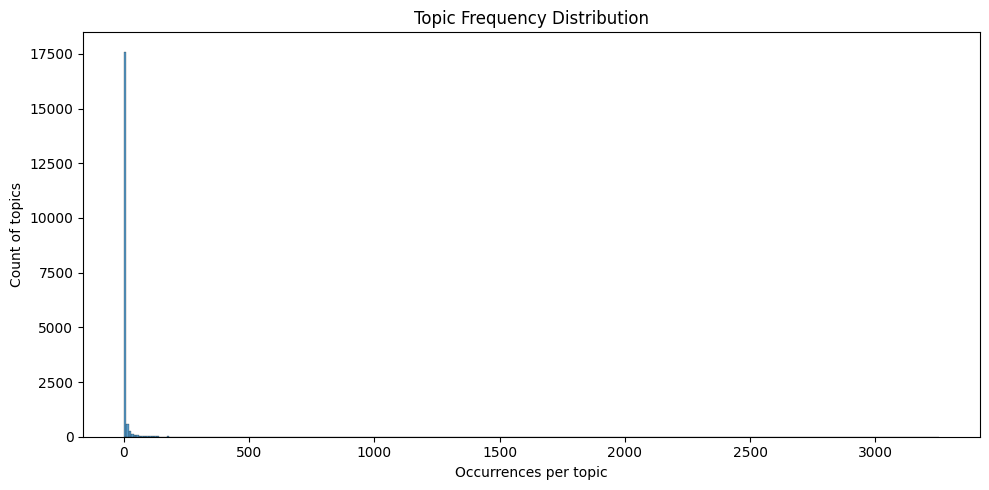


Top 20 coverage of all occurrences: 20.84%


In [72]:
# Frequency analysis of cleaned topics (top 20 + histogram)

import matplotlib.pyplot as plt
import seaborn as sns

if 'df_all_items' not in globals():
    raise RuntimeError("DataFrame 'df_all_items' not found. Ensure previous cell creating it has run.")
if 'topic' not in df_all_items.columns:
    raise ValueError("Expected column 'topic' in df_all_items.")

# Compute frequencies
freq_series = df_all_items['topic'].value_counts()

print(f"Total unique topics: {len(freq_series)}")
print("\nTop 20 topics by frequency:\n")
Top20 = freq_series.head(20).reset_index()
Top20.columns = ['topic','count']
for i, row in Top20.iterrows():
    print(f"{i+1:2d}. {row['topic']}  -> {row['count']}")

# Display DataFrame of top 20
Top20

# Histogram of frequency distribution (log scale on y for skewed counts)
plt.figure(figsize=(10,5))
sns.histplot(freq_series.values, binwidth=10)
plt.title('Topic Frequency Distribution')
plt.xlabel('Occurrences per topic')
plt.ylabel('Count of topics')
plt.tight_layout()
plt.show()

# Optional: cumulative coverage of top N
total = freq_series.sum()
cumulative = freq_series.head(20).sum()
print(f"\nTop 20 coverage of all occurrences: {cumulative/total:.2%}")

In [30]:
# List topics consisting of more than X words)
words = 4
multiword_topics = (
    merged_topics
        .dropna()
        .loc[merged_topics.str.strip().str.split().str.len() > words]
        .sort_values()
        .reset_index(drop=True)
)
print(f"Total topics: {len(merged_topics)}")
print(f"Topics with >{words} words: {len(multiword_topics)}")
multiword_topics

Total topics: 19452
Topics with >4 words: 263


0         advanced data analysis (code interpreter)
1         advanced driver assistance systems (adas)
2                     agent to agent (a2a) protocol
3                            agentic ai / ai agents
4                ai in domain specific applications
                           ...                     
258           web application development (with ai)
259    web application firewall (waf) configuration
260                web crawling for llm pretraining
261                     web ui development (for ai)
262            zero-shot chain of thought prompting
Name: topics, Length: 263, dtype: object

In [75]:
df_all_items

,topic
0,1-bit inference
1,1-bit inference
2,1-bit llm
3,1-bit llm
4,1-bit llm
...,...
146695,zmp control
146696,zombie startups
146697,zone-based navigation
146698,zoom


## Filter f >=2


Filtering topics with frequency < 2...
Rows removed: 11553
Unique topics removed: 11553
Remaining rows: 135147
Remaining unique topics: 7458

Top 20 topics after filtering (freq>=2):

 1. prompt engineering  -> 3255
 2. natural language processing (nlp)  -> 2996
 3. computer vision  -> 2611
 4. large language model (llm)  -> 2569
 5. llm api  -> 2445
 6. retrieval-augmented generation (rag)  -> 2180
 7. vector search  -> 1585
 8. reinforcement learning (ppo)  -> 1401
 9. finetuning  -> 1390
10. generative ai (image)  -> 1244
11. langchain  -> 1164
12. image generation  -> 1024
13. pytorch  -> 994
14. quantization (int8)  -> 958
15. machine learning (ml)  -> 890
16. code generation  -> 844
17. conversational ai  -> 778
18. ai agent  -> 765
19. memory-efficient training  -> 749
20. low-rank adaptation (lora)  -> 724
21. multi-agent system  -> 713
22. model deployment  -> 673
23. video generation  -> 672
24. stable diffusion (sdxl)  -> 662
25. diffusion model  -> 649
26. multimodal ai  -

,topic,count
0,prompt engineering,3255
1,natural language processing (nlp),2996
2,computer vision,2611
3,large language model (llm),2569
4,llm api,2445
...,...,...
7453,nodes,2
7454,noise injection,2
7455,non-autoregressive modeling,2
7456,nope,2


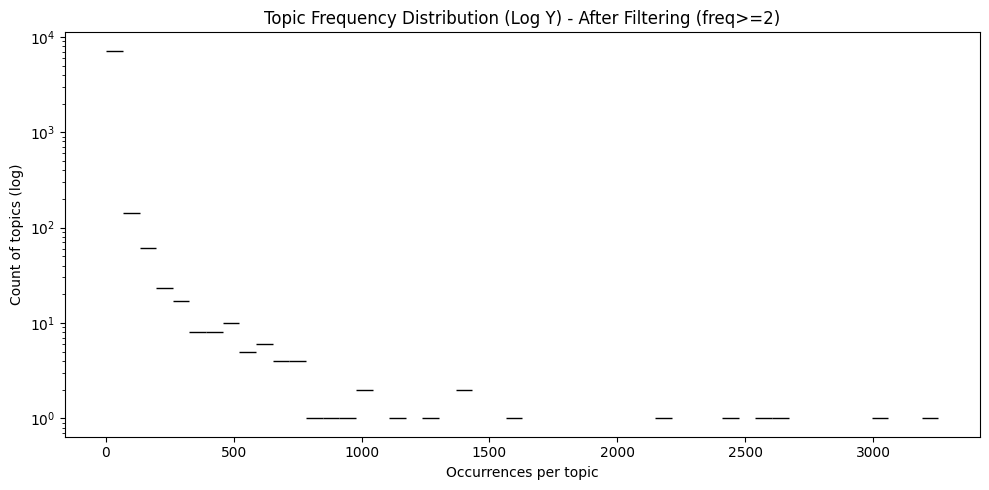


Updated df_all_items to filtered dataset (freq >=2).


,topic
0,1-bit inference
1,1-bit inference
2,1-bit llm
3,1-bit llm
4,1-bit llm
...,...
135142,zero/zero++
135143,zerogpu
135144,zerogpu
135145,zmp control


In [78]:
# ---------------- Filter topics with frequency >=2 ----------------
min_freq = 2
mask_keep = df_all_items['topic'].map(freq_series) >= min_freq
filtered_df_all_items = df_all_items[mask_keep].reset_index(drop=True)
removed = len(df_all_items) - len(filtered_df_all_items)
removed_unique = (freq_series < min_freq).sum()

print(f"\nFiltering topics with frequency < {min_freq}...")
print(f"Rows removed: {removed}")
print(f"Unique topics removed: {removed_unique}")
print(f"Remaining rows: {len(filtered_df_all_items)}")
print(f"Remaining unique topics: {filtered_df_all_items['topic'].nunique()}")

# Recompute frequencies after filtering
freq_after = filtered_df_all_items['topic'].value_counts()
print("\nTop 20 topics after filtering (freq>=2):\n")
Dic_topics = freq_after.reset_index()
Dic_topics.columns = ['topic','count']
for i, row in Dic_topics.iterrows():
    print(f"{i+1:2d}. {row['topic']}  -> {row['count']}")

display(Dic_topics)

plt.figure(figsize=(10,5))
sns.histplot(freq_after.values, bins=50, log_scale=(False, True))
plt.title('Topic Frequency Distribution (Log Y) - After Filtering (freq>=2)')
plt.xlabel('Occurrences per topic')
plt.ylabel('Count of topics (log)')
plt.tight_layout()
plt.show()


print("\nUpdated df_all_items to filtered dataset (freq >=2).")
filtered_df_all_items

# Dictionary topics

In [80]:
Dic_topics

,topic,count
0,prompt engineering,3255
1,natural language processing (nlp),2996
2,computer vision,2611
3,large language model (llm),2569
4,llm api,2445
...,...,...
7453,nodes,2
7454,noise injection,2
7455,non-autoregressive modeling,2
7456,nope,2


### Save dictionary

In [86]:
#Save data

file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Topics\\'
file_name = f'dic_topics_{date.today()}.csv'

Dic_topics.to_csv(file_path + file_name, index=False)
print(f"File {file_name} uploaded: ", date.today())

print('File uploaded successfully')
print(Dic_topics.shape)

File dic_topics_2025-11-08.csv uploaded:  2025-11-08
File uploaded successfully
(7458, 2)


In [31]:
# Display all multiword_topics items in full (no truncation)
pd.set_option('display.max_colwidth', None)
print(f"All {len(multiword_topics)} multiword topics:\n")
print("=" * 100)
for idx, topic in enumerate(multiword_topics):
    print(f"{idx:4d}: {topic}")
print("=" * 100)
print(f"\nTotal: {len(multiword_topics)} topics with more than 4 words")
pd.reset_option('display.max_colwidth')

All 263 multiword topics:

   0: advanced data analysis (code interpreter)
   1: advanced driver assistance systems (adas)
   2: agent to agent (a2a) protocol
   3: agentic ai / ai agents
   4: ai in domain specific applications
   5: ai in protein structure prediction
   6: ai performance and cost optimization
   7: ai safety and content filtering
   8: ai safety and content moderation
   9: ai user interface (ui) development
  10: alignment by preference optimization (apo)
  11: amazon bedrock agentcore starter toolkit
  12: amazon bedrock custom model import
  13: amazon elastic compute cloud (amazon ec2)
  14: amazon elastic container registry (amazon ecr)
  15: amazon managed service for apache flink
  16: amazon sagemaker partner ai apps sdks
  17: amazon sagemaker unified studio ide
  18: amazon titan text embeddings v2
  19: and applications across different contexts.
  20: anti-hallucination testing ml frameworks/tools: huggingface
  21: api rate limiting and backoff handling


In [33]:
# Identify and merge semantic duplicates: abbreviations + full forms
# Strategy: detect common AI abbreviation patterns and their expansions
merged_topics1 = merged_topics.copy()
import re
from collections import defaultdict

# Known abbreviation mappings (expandable)
KNOWN_ABBREV_MAP = {
    'ai': 'artificial intelligence',
    'ml': 'machine learning',
    'nlp': 'natural language processing',
    'cv': 'computer vision',
    'dl': 'deep learning',
    'rl': 'reinforcement learning',
    'gan': 'generative adversarial network',
    'gans': 'generative adversarial networks',
    'cnn': 'convolutional neural network',
    'cnns': 'convolutional neural networks',
    'rnn': 'recurrent neural network',
    'rnns': 'recurrent neural networks',
    'lstm': 'long short-term memory',
    'gru': 'gated recurrent unit',
    'bert': 'bidirectional encoder representations from transformers',
    'gpt': 'generative pre-trained transformer',
    'vae': 'variational autoencoder',
    'api': 'application programming interface',
    'apis': 'application programming interfaces',
    'sdk': 'software development kit',
    'rag': 'retrieval augmented generation',
    'llm': 'large language model',
    'llms': 'large language models',
    'asr': 'automatic speech recognition',
    'tts': 'text-to-speech',
    'ocr': 'optical character recognition',
    'roi': 'return on investment',
    'kpi': 'key performance indicator',
    'kpis': 'key performance indicators',
    'mlops': 'machine learning operations',
    'devops': 'development operations',
    'cicd': 'continuous integration continuous deployment',
    'ci/cd': 'continuous integration continuous deployment',
    'aws': 'amazon web services',
    'gcp': 'google cloud platform',
    'sql': 'structured query language',
    'nosql': 'non-relational database',
    'etl': 'extract transform load',
    'ui': 'user interface',
    'ux': 'user experience',
    'saas': 'software as a service',
    'paas': 'platform as a service',
    'iaas': 'infrastructure as a service',
}

print(f"Starting with {len(merged_topics1)} unique topics")

# Build a mapping of detected abbreviation-full form pairs
abbrev_to_full = {}
full_to_abbrev = {}

topics_set = set(merged_topics1.dropna().str.strip().str.lower())

# 1. Check known abbreviations
for abbrev, full_form in KNOWN_ABBREV_MAP.items():
    abbrev_clean = abbrev.lower().strip()
    full_clean = full_form.lower().strip()
    
    if abbrev_clean in topics_set and full_clean in topics_set:
        # Both exist - merge them
        abbrev_to_full[abbrev_clean] = full_clean
        full_to_abbrev[full_clean] = abbrev_clean
        print(f"  Found pair: '{abbrev_clean}' <-> '{full_clean}'")
    elif abbrev_clean in topics_set:
        # Only abbrev exists, but we know the full form - keep abbrev as-is for now
        pass
    elif full_clean in topics_set:
        # Only full form exists - keep it
        pass

# 2. Detect patterns like "full form (abbrev)" or "abbrev (full form)" already in data
pattern_with_parens = re.compile(r'^(.+?)\s*\(([^)]+)\)$')
for topic in topics_set:
    match = pattern_with_parens.match(topic)
    if match:
        part1 = match.group(1).strip().lower()
        part2 = match.group(2).strip().lower()
        
        # Heuristic: shorter part is likely abbreviation
        if len(part2) <= 5 and len(part1) > len(part2):
            # part2 is abbreviation
            if part2 in topics_set or part1 in topics_set:
                abbrev_to_full[part2] = part1
                full_to_abbrev[part1] = part2
        elif len(part1) <= 5 and len(part2) > len(part1):
            # part1 is abbreviation
            if part1 in topics_set or part2 in topics_set:
                abbrev_to_full[part1] = part2
                full_to_abbrev[part2] = part1

print(f"\nDetected {len(abbrev_to_full)} abbreviation-full form pairs")

# 3. Create canonical mapping: merge both into "full form (abbrev)"
canonical_map = {}

for abbrev, full in abbrev_to_full.items():
    canonical = f"{full} ({abbrev})"
    # Map both abbreviation and full form to canonical
    canonical_map[abbrev] = canonical
    canonical_map[full] = canonical
    
print(f"\nCreated {len(canonical_map)} merge mappings")

# Sample mappings
print("\nSample canonical mappings (first 15):")
for i, (orig, canon) in enumerate(sorted(canonical_map.items())[:15]):
    print(f"  '{orig}' → '{canon}'")

# 4. Apply canonical mapping to topic_items
before_count = len(merged_topics1)
topic_items_merged = merged_topics1.map(lambda x: canonical_map.get(x.lower().strip(), x) if pd.notna(x) else x)
topic_items_merged = topic_items_merged.drop_duplicates().sort_values().reset_index(drop=True)
after_count = len(topic_items_merged)

print(f"\n{'='*80}")
print(f"Topics before merging semantic duplicates: {before_count}")
print(f"Topics after merging:                      {after_count}")
print(f"Reduced by:                                 {before_count - after_count}")
print(f"{'='*80}")

# Show examples of what changed
merged_examples = []
for orig in merged_topics1.head(100):
    if pd.notna(orig):
        canonical = canonical_map.get(orig.lower().strip())
        if canonical and canonical != orig:
            merged_examples.append((orig, canonical))
            if len(merged_examples) >= 10:
                break

if merged_examples:
    print("\nExample merges (up to 10):")
    for orig, merged in merged_examples:
        print(f"  '{orig}' → '{merged}'")

# Reassign topic_items
merged_topics1 = topic_items_merged.copy()
print(f"\nFinal merged_topics1 count: {len(merged_topics1)}")
merged_topics1.head(25)

Starting with 19452 unique topics
  Found pair: 'ai' <-> 'artificial intelligence'
  Found pair: 'ml' <-> 'machine learning'
  Found pair: 'nlp' <-> 'natural language processing'
  Found pair: 'cnn' <-> 'convolutional neural network'
  Found pair: 'rnn' <-> 'recurrent neural network'
  Found pair: 'lstm' <-> 'long short-term memory'
  Found pair: 'vae' <-> 'variational autoencoder'
  Found pair: 'rag' <-> 'retrieval augmented generation'
  Found pair: 'llm' <-> 'large language model'
  Found pair: 'asr' <-> 'automatic speech recognition'
  Found pair: 'tts' <-> 'text-to-speech'
  Found pair: 'ocr' <-> 'optical character recognition'
  Found pair: 'mlops' <-> 'machine learning operations'
  Found pair: 'aws' <-> 'amazon web services'
  Found pair: 'gcp' <-> 'google cloud platform'

Detected 349 abbreviation-full form pairs

Created 675 merge mappings

Sample canonical mappings (first 15):
  '128k' → 'long-context llms (128k)'
  '4-bit' → 'quantization (4-bit)'
  '4-bit quantization' → '

0                                
1                            .net
2           /invocations endpoint
3                  /ping endpoint
4                           000hz
5                          000mah
6                 1-bit inference
7                       1-bit llm
8           1-bit neural networks
9              1-bit quantization
10             1-bit transformers
11    1.5b-parameter llm backbone
12            128k context window
13                             1u
14             2-bit quantization
15                         2.4ghz
16            2.5d representation
17                   2d animation
18         2d animation (with ai)
19          2d block quantization
20          2d texture generation
21            2d-to-3d conversion
22        2d/3d spatial reasoning
23                              3
24                          3-bit
Name: topics, dtype: object

In [45]:
# Convert merged_topics1 Series to DataFrame with 'id' and 'topic' columns
df_topics = pd.DataFrame({
    'id': range(len(merged_topics1)),
    'topic': merged_topics1.values
})

print(f"Created DataFrame with {len(df_topics)} topics")

# Remove rows where topic is empty string
df_topics = df_topics[df_topics['topic'] != ''].reset_index(drop=True)
print(f"Rows after removing empty topics: {len(df_topics)}")
df_topics

Created DataFrame with 19023 topics
Rows after removing empty topics: 19022


,id,topic
0,1,.net
1,2,/invocations endpoint
2,3,/ping endpoint
3,4,000hz
4,5,000mah
...,...,...
19017,19018,zmp control
19018,19019,zombie startups
19019,19020,zone-based navigation
19020,19021,zoom


# Get defenision (LLM)

In [119]:
# === Load Environment Variables ===
load_dotenv()  # Loads variables from .env file into environment

# Retrieve database connection parameters from environment variables
DIAL_API_KEY = os.getenv('DIAL_API_KEY')

#print(DIAL_API_KEY)

dial-jzrvldj5w14srjlm1bs2bc99myp


In [112]:
topic_items = df_topics.copy()
#topic_items = topic_items.head(25)
topic_items = topic_items.iloc[9474:9475]
topic_items

,id,topic
9474,9475,lag-llama


#### Correction

In [126]:
file_path = 'C:\\Users\\Denis_Davydov2\\OneDrive - EPAM\\Prophet_AI_docs\\Datasets\\AI_skills\\Topics\\'
file_name = 'not_recognised.csv'


no_topics = pd.read_csv(file_path+file_name)
print("File read: ", file_name)
topic_items = no_topics[['id', 'term']].rename(columns={'term':'topic'})
topic_items

File read:  not_recognised.csv


File read:  not_recognised.csv


,id,topic
0,244,active recall
1,618,agones
2,1522,ai-gradio
3,1710,almond
4,1959,any
...,...,...
231,18965,zenmcp
232,18966,zephyr
233,18977,zero++
234,19013,zig


### 1. Version 1 (standart)

In [65]:
# Version 1 (standart)
# Terms definition with Azure OpenAI
# Uses DIAL_API_KEY from environment. Outputs CSV: id, term, definition


import os
import time
import pandas as pd
from datetime import datetime, date
from typing import List, Dict
from langchain_openai import AzureChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Ensure topics dataframe (topic_items) exists
if 'topic_items' not in globals():
    raise RuntimeError("'topic_items' DataFrame not found. Run previous cells that build it.")
if not set(['id','topic']).issubset(topic_items.columns):
    raise ValueError("topic_items must contain 'id' and 'topic' columns.")

DIAL_API_KEY = os.getenv('DIAL_API_KEY')
if not DIAL_API_KEY:
    raise EnvironmentError("DIAL_API_KEY environment variable is not set. Add it to .env or your session.")

AZURE_OPENAI_ENDPOINT = "https://ai-proxy.lab.epam.com"
# Choose a deployment that supports web search / tools (adjust if needed)
AZURE_OPENAI_DEPLOYMENT = "gemini-2.5-pro" 
#AZURE_OPENAI_DEPLOYMENT = "gemini-2.5-pro-google-search"  # fallback to "gemini-2.5-pro" if not available
API_VERSION = "2025-04-01-preview"

# Config
OUTPUT_FILE = f"topics_definitions_{date.today()}_3.csv"  
BATCH_SIZE = 20
SLEEP_BETWEEN_CALLS = 2.0  # adjust for rate limits
TEMPERATURE = 0

SYSTEM_MESSAGE = (
    "You are a talent recruiter building a canonical AI skills glossary. "
    "Provide a concise 1-2 sentence definition for each AI-related term. "
    "Be precise, neutral, and industry-standard; avoid marketing fluff."
)

PROMPT_TEMPLATE = """
Please define the term "{text}" strictly in the context of AI / Machine Learning.
Use web search to provide the most current and reliable definition.
Return ONLY the definition (1-2 sentences). Do not include preambles, lists, or quotes.
"""

prompt = ChatPromptTemplate.from_messages([
    ("system", SYSTEM_MESSAGE),
    ("human", PROMPT_TEMPLATE),
])

model = AzureChatOpenAI(
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
    api_key=DIAL_API_KEY,
    api_version=API_VERSION,
    azure_deployment=AZURE_OPENAI_DEPLOYMENT,
    temperature=TEMPERATURE,
)

parser = StrOutputParser()
chain = prompt | model | parser

# Helper batching
def batch_iterable(items: List[Dict], size: int):
    for i in range(0, len(items), size):
        yield items[i:i+size]

# Prepare inputs
df_terms = topic_items.dropna(subset=["topic"]).copy()
print(f"Rows to process (after dropping NaN topics): {len(df_terms)}")

payloads = [{"id": int(row.id), "text": str(row.topic).strip()} for row in df_terms.itertuples(index=False) if str(row.topic).strip()]
print(f"Total payloads: {len(payloads)}")

# Process
ts_start = datetime.now()
print('Start:', ts_start)
results = []
errors = 0
batches_total = (len(payloads) + BATCH_SIZE - 1) // BATCH_SIZE
processed_batches = 0
print(f"Processed batches: 0/{batches_total}", end='', flush=True)

for batch in batch_iterable(payloads, BATCH_SIZE):
    try:
        batch_inputs = [{"text": item["text"]} for item in batch]
        outputs = chain.batch(batch_inputs)
        for item, definition in zip(batch, outputs):
            definition_clean = (definition or "").strip().replace("\n", " ")
            definition_clean = ' '.join(definition_clean.split())  # collapse whitespace
            results.append({"id": item["id"], "term": item["text"], "definition": definition_clean})
    except Exception as e:
        errors += 1
        print(f"\nError in batch {processed_batches+1}: {e}")
        # Add empty definitions so ID alignment is preserved
        for item in batch:
            results.append({"id": item["id"], "term": item["text"], "definition": ""})
    finally:
        processed_batches += 1
        print(f"\rProcessed batches: {processed_batches}/{batches_total}", end='', flush=True)
        time.sleep(SLEEP_BETWEEN_CALLS)

print()  # newline

# Build DataFrame
df_definitions = pd.DataFrame(results, columns=["id","term","definition"]).sort_values("id").reset_index(drop=True)

# Stats
ts_end = datetime.now()
print('Finish:', ts_end)
print('Processing time:', ts_end - ts_start)
print('Terms processed:', len(df_definitions))
print('Batches with errors:', errors)
empty_defs = (df_definitions["definition"].str.len() == 0).sum()
print('Empty definitions:', empty_defs)

# Save
output_path = os.path.join(folder_path, OUTPUT_FILE)
df_definitions.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"Results saved to: {output_path}")

# Preview
df_definitions.head(20)

Rows to process (after dropping NaN topics): 5019
Total payloads: 5019
Start: 2025-11-02 19:25:42.048739
Processed batches: 76/251
Error in batch 77: Error code: 429 - {'error': {'message': 'Hit token rate limit. Minute limit: 51914 / 128000 tokens. Day limit: 2003798 / 2000000 tokens. Week limit: 4006146 / 9223372036854775807 tokens. Month limit: 4006146 / 9223372036854775807 tokens.', 'display_message': "You've exceeded your daily token limit", 'code': '429'}}
Processed batches: 77/251
Error in batch 77: Error code: 429 - {'error': {'message': 'Hit token rate limit. Minute limit: 51914 / 128000 tokens. Day limit: 2003798 / 2000000 tokens. Week limit: 4006146 / 9223372036854775807 tokens. Month limit: 4006146 / 9223372036854775807 tokens.', 'display_message': "You've exceeded your daily token limit", 'code': '429'}}
Processed batches: 77/251
Error in batch 78: Error code: 429 - {'error': {'message': 'Hit token rate limit. Minute limit: 38201 / 128000 tokens. Day limit: 2003798 / 20000

,id,term,definition
0,4982,data lifecycle management,Data lifecycle management in AI/ML is the end-...
1,4983,data lineage,"In AI/ML, data lineage is the process of track..."
2,4984,data literacy,Data literacy in the context of AI/ML is the a...
3,4985,data loaders,Data loaders are utilities that provide an ite...
4,4986,data loading,Data loading is the process of reading data fr...
5,4987,data loading optimization,Data loading optimization refers to the set of...
6,4988,data logging,"In machine learning, data logging is the syste..."
7,4989,data loss prevention (ai),Data loss prevention in AI is the application ...
8,4990,data loss prevention (dlp),"In the context of AI/ML, Data Loss Prevention ..."
9,4991,data management,Data management in AI/ML is the end-to-end pro...


### 2. Web search version

In [127]:
#Version 2 with web search (robust error handling)
"""
Terms definition with Azure OpenAI (web-search/tool-enabled deployment).
Adds defensive checks against NoneType errors on tool binding and batch execution.

Output CSV format: id, term, definition
"""

# --- Imports ---
import os
import time
from datetime import datetime, date
from typing import List, Dict, Optional

import pandas as pd
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import AzureChatOpenAI

# --- Environment & Pre-flight Checks ---
if 'topic_items' not in globals():
    raise RuntimeError("'topic_items' DataFrame not found. Please run the preceding cells that create it.")
if not {'id', 'topic'}.issubset(topic_items.columns):
    raise ValueError("The 'topic_items' DataFrame must contain 'id' and 'topic' columns.")


# =============================== Configuration ==========================================
AZURE_OPENAI_ENDPOINT = os.getenv("AZURE_OPENAI_ENDPOINT", "https://ai-proxy.lab.epam.com")
#AZURE_OPENAI_DEPLOYMENT = 'gpt-5-mini-2025-08-07'
AZURE_OPENAI_DEPLOYMENT = 'gemini-2.5-flash'
#AZURE_OPENAI_DEPLOYMENT = 'gemini-2.5-pro-google-search'
#AZURE_OPENAI_DEPLOYMENT = 'gemini-2.5-pro'

API_VERSION = os.getenv("AZURE_OPENAI_API_VERSION", "2025-04-01-preview")

# Infer search tool type safely
SEARCH_TOOL_TYPE = os.getenv("AZURE_OPENAI_SEARCH_TOOL_TYPE") or (
    "google_search" if "google" in (AZURE_OPENAI_DEPLOYMENT or "").lower() else "web_search"
)

OUTPUT_FILE = f"topics_definitions_{date.today()}_g2.csv"
BATCH_SIZE = 20
SLEEP_BETWEEN_CALLS = 2.0
TEMPERATURE = 0
MAX_RETRIES = 0

SYSTEM_MESSAGE = (
    "You are a talent recruiter building a canonical AI skills glossary. "
    "Provide a concise 1-2 sentence definition for each AI-related term. "
    "Be precise, neutral, and industry-standard; avoid marketing fluff. "
    "Prefer up-to-date and authoritative sources when using web search."
)

PROMPT_TEMPLATE = """
Please define the term "{text}" strictly in the context of AI / Machine Learning.
Use web search when helpful to provide the most current and reliable definition.
Return ONLY the definition (1-2 sentences). Do not include preambles, lists, or quotes.
"""

prompt = ChatPromptTemplate.from_messages([
    ("system", SYSTEM_MESSAGE),
    ("human", PROMPT_TEMPLATE),
])

# --- Model Initialization with Safe Tool Binding ---
base_model = AzureChatOpenAI(
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
    api_key=DIAL_API_KEY,
    api_version=API_VERSION,
    azure_deployment=AZURE_OPENAI_DEPLOYMENT,
    #temperature=TEMPERATURE,
)

WEB_SEARCH_ENABLED = False
model = base_model

# Attempt tool binding only if SEARCH_TOOL_TYPE seems valid
if isinstance(SEARCH_TOOL_TYPE, str) and SEARCH_TOOL_TYPE.strip():
    tools = [{"type": SEARCH_TOOL_TYPE.strip()}]
    try:
        candidate = base_model.bind(tools=tools)
        # Quick dry-run call to ensure the bound model works; single trivial invocation
        _ = (prompt | candidate | StrOutputParser()).invoke({"text": "ai"})
        model = candidate
        WEB_SEARCH_ENABLED = True
    except Exception as e:
        print(f"Tool binding failed, falling back to base model. Reason: {e}")
        WEB_SEARCH_ENABLED = False
else:
    print("No valid SEARCH_TOOL_TYPE provided; continuing without tools.")

parser = StrOutputParser()
chain = prompt | model | parser

# --- Helper Functions ---

def batch_iterable(items: List[Dict], size: int):
    for i in range(0, len(items), size):
        yield items[i:i + size]

def run_batch_with_retries(batch_inputs, retries=MAX_RETRIES, sleep=SLEEP_BETWEEN_CALLS):
    last_err: Optional[Exception] = None
    for attempt in range(retries + 1):
        try:
            return chain.batch(batch_inputs)
        except Exception as e:
            last_err = e
            if attempt < retries:
                # Exponential backoff
                backoff = sleep * (1.5 ** attempt)
                print(f"Retry {attempt+1}/{retries} after error: {e}. Sleeping {backoff:.1f}s")
                time.sleep(backoff)
            else:
                raise e
    if last_err:
        raise last_err

# --- Data Preparation ---
df_terms = topic_items.dropna(subset=["topic"]).copy()
# Defensive strip & filter
payloads = []
for row in df_terms.itertuples(index=False):
    raw = getattr(row, 'topic', '')
    if raw is None:
        continue
    text = str(raw).strip()
    if not text:
        continue
    payloads.append({"id": int(row.id), "text": text})

print(f"Rows to process (after dropping NaN topics): {len(df_terms)}")
print(f"Total payloads to process: {len(payloads)}")
print(f"Web search tool type: {SEARCH_TOOL_TYPE} | Web search enabled: {WEB_SEARCH_ENABLED}")

# --- Main Processing Loop ---
ts_start = datetime.now()
print(f'Start time: {ts_start}')

results = []
errors = 0
batches_total = (len(payloads) + BATCH_SIZE - 1) // BATCH_SIZE
processed_batches = 0
print(f"Processed batches: 0/{batches_total}", end='', flush=True)

for batch in batch_iterable(payloads, BATCH_SIZE):
    try:
        batch_inputs = [{"text": item["text"]} for item in batch]
        outputs = run_batch_with_retries(batch_inputs)
        for item, definition in zip(batch, outputs):
            definition_clean = (definition or "").strip().replace("\n", " ")
            definition_clean = ' '.join(definition_clean.split())
            results.append({"id": item["id"], "term": item["text"], "definition": definition_clean})
    except Exception as e:
        errors += 1
        print(f"\nError processing batch {processed_batches + 1}: {e}")
        for item in batch:
            results.append({"id": item["id"], "term": item["text"], "definition": ""})
    finally:
        processed_batches += 1
        print(f"\rProcessed batches: {processed_batches}/{batches_total}", end='', flush=True)
        time.sleep(SLEEP_BETWEEN_CALLS)

print("\n")

# --- Results, Statistics, and Saving ---
df_definitions = pd.DataFrame(results, columns=["id", "term", "definition"]).sort_values("id").reset_index(drop=True)

ts_end = datetime.now()
print(f'Finish time: {ts_end}')
print(f'Total processing time: {ts_end - ts_start}')
print(f'Terms processed: {len(df_definitions)}')
print(f'Batches with errors: {errors}')
empty_defs = (df_definitions["definition"].str.len() == 0).sum()
print(f'Empty definitions: {empty_defs}')

if 'folder_path' not in globals():
    folder_path = os.getcwd()
output_path = os.path.join(folder_path, OUTPUT_FILE)
df_definitions.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"Results saved to: {output_path}")

print("\n--- Preview of Definitions ---")
print(df_definitions.head(20))

Tool binding failed, falling back to base model. Reason: 'NoneType' object has no attribute 'startswith'
Rows to process (after dropping NaN topics): 236
Total payloads to process: 236
Web search tool type: web_search | Web search enabled: False
Start time: 2025-11-03 21:15:07.305365
Processed batches: 12/12

Finish time: 2025-11-03 21:20:32.945990
Total processing time: 0:05:25.640625
Terms processed: 236
Batches with errors: 0
Empty definitions: 1
Results saved to: C:\Users\Denis_Davydov2\OneDrive - EPAM\Prophet_AI_docs\Datasets\AI_skills\Topics\topics_definitions_2025-11-03_g2.csv

--- Preview of Definitions ---
      id                        term  \
0    244               active recall   
1    618                      agones   
2   1522                   ai-gradio   
3   1710                      almond   
4   1959                         any   
5   2146         artificial analysis   
6   2229                      athena   
7   2626                      avc-lm   
8   2843         

#### Save result

In [32]:
# Save to CSV
output_path = os.path.join(folder_path, OUTPUT_FILE)
df_definitions.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"Results saved to: {output_path}")

Results saved to: C:\Users\Denis_Davydov2\OneDrive - EPAM\Prophet_AI_docs\Datasets\AI_skills\Topics\topics_defenition_2025-10-31.csv
